In [1]:
from ase.calculators.lammpslib import LAMMPSlib
import numpy as np
import matplotlib.pylab as plt
from ase.visualize import view
from ase import Atom, Atoms
import ase.build
from ase.optimize import BFGS
import ase.neb
import ase.constraints
import pyiron

In [2]:
# setup lammps calculator:
# LAMMPSlib?
cmds = ['pair_style hdnnp 6.5 dir  ./  showew no showewsum 0 resetew yes maxew 1000000 cflength 1.8897261328 cfenergy 0.0367493254\n', 
 'pair_coeff * * Fe \n']
lammps = LAMMPSlib(lmpcmds=cmds)

cmds2 = ['pair_style hdnnp 6.5 dir  ./  showew no showewsum 0 resetew yes maxew 1000000 cflength 1.8897261328 cfenergy 0.0367493254\n', 
 'pair_coeff * * Fe H\n']
lammps2 = LAMMPSlib(lmpcmds=cmds2)


https://wiki.fysik.dtu.dk/ase/ase/calculators/lammpslib.html#lammpslib

In [3]:
pr = pyiron.Project('NEB')

### 1. Diffusion energy barrier (T site to T site)

In [150]:
job = pr.create.job.Lammps('optimize_cell', delete_existing_job=True)
bulk = pr.create.structure.bulk('Fe', cubic=True).repeat([3,3,3])
job.structure = bulk
job.potential = job.list_potentials()[0]
job.calc_minimize(pressure=[0,0,0,0,0,0])
job.run(delete_existing_job=True)
print(job.output.energy_tot)

bulk = job.get_structure(-1)
job = pr.create.job.Lammps('optimize_positions', delete_existing_job=True)
job.structure = bulk
job.potential = job.list_potentials()[0]
job.calc_minimize()
job.run(delete_existing_job=True)
print(job.output.energy_tot)



The job optimize_cell was saved and received the ID: 10835
[-444.43160652 -444.99007126 -445.04358046]
The job optimize_positions was saved and received the ID: 10836
[-445.04358046 -445.04358046]


In [151]:
bulk = job.get_structure(-1)
cell = bulk.get_cell()
bulk_H_T_imageI = bulk.copy()
H = pr.create.structure.atoms('H', positions=[(2.83/4, 2.83/4*8, 2.83/2)], cell=cell)
bulk_H_T_imageI += H
bulk_H_T_imageI.plot3d()

NGLWidget()

In [152]:
bulk_H_T_imageF = bulk.copy()
H = pr.create.structure.atoms(elements=['H'], positions=[(2.83/2, 2.83/4*8, 2.83/4*3)], cell=cell)
bulk_H_T_imageF += H
bulk_H_T_imageF.plot3d()

NGLWidget()

In [153]:
IS = bulk_H_T_imageI.to_ase()
IS.calc = lammps2
FS = bulk_H_T_imageF.to_ase()
FS.calc = lammps2

In [154]:
opt = BFGS(IS)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 15:51:26     -447.935994        1.646468
BFGS:    1 15:51:26     -448.065042        1.047512
BFGS:    2 15:51:26     -448.164450        0.132761
BFGS:    3 15:51:26     -448.168709        0.119800
BFGS:    4 15:51:27     -448.172475        0.076802
BFGS:    5 15:51:27     -448.174738        0.065359
BFGS:    6 15:51:27     -448.175476        0.024380
BFGS:    7 15:51:27     -448.175653        0.019741
BFGS:    8 15:51:27     -448.175744        0.014277
BFGS:    9 15:51:27     -448.175815        0.011565
BFGS:   10 15:51:27     -448.175852        0.008270


True

In [155]:
opt = BFGS(FS)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 15:51:31     -447.935994        1.646196
BFGS:    1 15:51:31     -448.065042        1.047353
BFGS:    2 15:51:32     -448.164450        0.132738
BFGS:    3 15:51:32     -448.168709        0.119781
BFGS:    4 15:51:32     -448.172475        0.076791
BFGS:    5 15:51:32     -448.174738        0.065337
BFGS:    6 15:51:32     -448.175476        0.024382
BFGS:    7 15:51:32     -448.175653        0.019743
BFGS:    8 15:51:32     -448.175744        0.014279
BFGS:    9 15:51:32     -448.175815        0.011574
BFGS:   10 15:51:32     -448.175852        0.008271


True

In [169]:
images = [IS]
images[0].calc = lammps2
for i in range(9):
    image = IS.copy()
    lammps = LAMMPSlib(lmpcmds=cmds2)
    image.calc = lammps
    images.append(image) 
images.append(FS)
lammps = LAMMPSlib(lmpcmds=cmds2)
images[-1].calc = lammps

neb = ase.mep.NEB(images, climb=True)
neb.interpolate()
minimizer = ase.optimize.FIRE(neb)
minimizer.run(fmax=0.01)

      Step     Time          Energy          fmax
FIRE:    0 15:56:27     -447.989984        0.680073
FIRE:    1 15:56:28     -448.005068        0.551457
FIRE:    2 15:56:29     -448.025344        0.373389
FIRE:    3 15:56:29     -448.039712        0.265575
FIRE:    4 15:56:30     -448.045217        0.329010
FIRE:    5 15:56:31     -448.047206        0.408817
FIRE:    6 15:56:31     -448.048209        0.390720
FIRE:    7 15:56:32     -448.050031        0.355374
FIRE:    8 15:56:33     -448.052340        0.304490
FIRE:    9 15:56:33     -448.054726        0.240659
FIRE:   10 15:56:34     -448.056791        0.167451
FIRE:   11 15:56:34     -448.058247        0.112002
FIRE:   12 15:56:35     -448.059023        0.114316
FIRE:   13 15:56:36     -448.059326        0.121048
FIRE:   14 15:56:36     -448.059484        0.158992
FIRE:   15 15:56:37     -448.059928        0.173719
FIRE:   16 15:56:38     -448.060929        0.159733
FIRE:   17 15:56:38     -448.062350        0.114854
FIRE:   18 15:

True

In [180]:
view(images)

In [171]:
energy_variation = [ i.get_potential_energy() for i in images]
energy_variation = np.array(energy_variation)
energy_variation -= energy_variation.min()

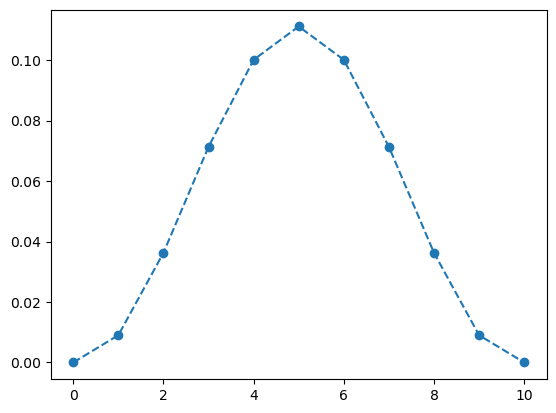

In [172]:
plt.plot(energy_variation, "o--")

In [173]:
energy_variation.max()

0.1111241931999416

0.108 eV in paper

### 2. diffusion of the H-vacancy complex (NEB)

#### V0+T0 -> V0+T1

In [297]:
IS_V0_T0 = bulk.copy()
del IS_V0_T0[36]
# IS_V0_T0.plot3d()
H = pr.create.structure.atoms('H', positions=[(2.83/4*7, 0, 2.83/2)],cell=cell)
IS_V0_T0 += H
IS_V0_T0.plot3d()

NGLWidget()

In [300]:
FS_V0_T1 = bulk.copy()
del FS_V0_T1[36]
# IS_V0_T0.plot3d()
H = pr.create.structure.atoms('H', positions=[(2.83/2*3, 0, 2.83/4)],cell=cell)
FS_V0_T1 += H
FS_V0_T1.plot3d()

NGLWidget()

In [301]:
IS = IS_V0_T0.to_ase()
IS.calc = lammps2
FS = FS_V0_T1.to_ase()
FS.calc = lammps2

opt = BFGS(IS)
opt.run(fmax=0.01)

opt = BFGS(FS)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 16:40:34     -437.767503        1.286201
BFGS:    1 16:40:34     -437.853603        1.118840
BFGS:    2 16:40:34     -437.996443        0.715297
BFGS:    3 16:40:34     -438.021398        0.638271
BFGS:    4 16:40:35     -438.073717        0.618266
BFGS:    5 16:40:35     -438.119511        0.517109
BFGS:    6 16:40:35     -438.161464        0.421638
BFGS:    7 16:40:35     -438.188236        0.424121
BFGS:    8 16:40:35     -438.210067        0.418179
BFGS:    9 16:40:35     -438.235176        0.384519
BFGS:   10 16:40:35     -438.255985        0.261181
BFGS:   11 16:40:35     -438.267289        0.234018
BFGS:   12 16:40:36     -438.275122        0.248910
BFGS:   13 16:40:36     -438.282539        0.260314
BFGS:   14 16:40:36     -438.288597        0.238525
BFGS:   15 16:40:36     -438.292721        0.186710
BFGS:   16 16:40:36     -438.295879        0.152129
BFGS:   17 16:40:36     -438.299007        0.193959
BFGS:   18 16:

True

In [273]:
view(FS)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

In [302]:
images = [IS]
images[0].calc = lammps2
for i in range(9):
    image = IS.copy()
    lammps2 = LAMMPSlib(lmpcmds=cmds2)
    image.calc = lammps2
    images.append(image) 
images.append(FS)
lammps2 = LAMMPSlib(lmpcmds=cmds2)
images[-1].calc = lammps2

neb = ase.mep.NEB(images, climb=True)
neb.interpolate()
minimizer = ase.optimize.FIRE(neb)
minimizer.run(fmax=0.01)

      Step     Time          Energy          fmax
FIRE:    0 16:40:42     -438.026806        0.468542
FIRE:    1 16:40:43     -438.029466        0.411863
FIRE:    2 16:40:43     -438.033917        0.370710
FIRE:    3 16:40:44     -438.038868        0.322856
FIRE:    4 16:40:45     -438.043286        0.263445
FIRE:    5 16:40:45     -438.046945        0.199605
FIRE:    6 16:40:46     -438.050303        0.198274
FIRE:    7 16:40:46     -438.053751        0.215447
FIRE:    8 16:40:47     -438.057419        0.172709
FIRE:    9 16:40:48     -438.060301        0.077061
FIRE:   10 16:40:48     -438.061527        0.088692
FIRE:   11 16:40:49     -438.061666        0.082648
FIRE:   12 16:40:49     -438.061911        0.071116
FIRE:   13 16:40:50     -438.062207        0.055265
FIRE:   14 16:40:51     -438.062489        0.039623
FIRE:   15 16:40:51     -438.062708        0.044993
FIRE:   16 16:40:52     -438.062841        0.057300
FIRE:   17 16:40:53     -438.062904        0.061229
FIRE:   18 16:

True

In [303]:
ase.visualize.view(images)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

In [304]:
energy_variation1 = [i.get_potential_energy() for i in images]
energy_variation1 = np.array(energy_variation1)
energy_variation1 -= energy_variation1.min()

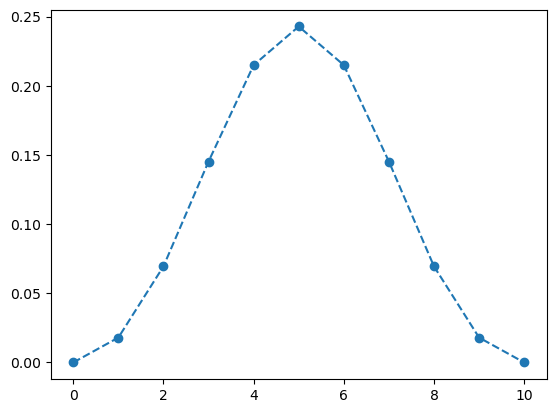

In [305]:
plt.plot(energy_variation1, "o--")

In [306]:
energy_variation1.max()

0.24279301882955906

0.245 eV in paper

#### V0+T1 -> V0 +T2

In [307]:
IS_V0_T1 = images[-1].copy()
IS_V0_T1 = pyiron.ase_to_pyiron(IS_V0_T1)
IS_V0_T1.plot3d()

NGLWidget()

In [309]:
FS_V0_T2 = bulk.copy()
del FS_V0_T2[36]
# FS_V0_T2.plot3d()
H = pr.create.structure.atoms('H', positions=[(2.83/4*5,0,2.83/2)], cell=cell)
FS_V0_T2 += H
FS_V0_T2.plot3d()

NGLWidget()

In [310]:
IS = IS_V0_T1.to_ase()
IS.calc = lammps2
FS = FS_V0_T2.to_ase()
FS.calc = lammps2

opt = BFGS(IS)
opt.run(fmax=0.01)

opt = BFGS(FS)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 16:42:07     -438.306020        0.006238
      Step     Time          Energy          fmax
BFGS:    0 16:42:07     -437.396450        1.710304
BFGS:    1 16:42:07     -437.557730        1.162776
BFGS:    2 16:42:07     -437.729279        0.267711
BFGS:    3 16:42:07     -437.744695        0.253516
BFGS:    4 16:42:07     -437.767086        0.304204
BFGS:    5 16:42:07     -437.779370        0.199915
BFGS:    6 16:42:07     -437.784332        0.063658
BFGS:    7 16:42:07     -437.785586        0.057221
BFGS:    8 16:42:07     -437.786327        0.045865
BFGS:    9 16:42:08     -437.786859        0.036961
BFGS:   10 16:42:08     -437.787093        0.031031
BFGS:   11 16:42:08     -437.787223        0.028064
BFGS:   12 16:42:08     -437.787363        0.031065
BFGS:   13 16:42:08     -437.787500        0.024082
BFGS:   14 16:42:08     -437.787596        0.021127
BFGS:   15 16:42:08     -437.787663        0.019577
BFGS:   16 16:42

True

In [282]:
view(FS)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

In [311]:
images = [IS]
images[0].calc = lammps2
for i in range(9):
    image = IS.copy()
    lammps2 = LAMMPSlib(lmpcmds=cmds2)
    image.calc = lammps2
    images.append(image) 
images.append(FS)
lammps2 = LAMMPSlib(lmpcmds=cmds2)
images[-1].calc = lammps2

neb = ase.mep.NEB(images, climb=True)
neb.interpolate()
minimizer = ase.optimize.FIRE(neb)
minimizer.run(fmax=0.01)

      Step     Time          Energy          fmax
FIRE:    0 16:42:21     -437.549695        2.195494
FIRE:    1 16:42:22     -437.599806        1.382291
FIRE:    2 16:42:22     -437.654821        0.658020
FIRE:    3 16:42:23     -437.677966        0.685115
FIRE:    4 16:42:24     -437.679239        0.652545
FIRE:    5 16:42:24     -437.681601        0.589257
FIRE:    6 16:42:25     -437.684728        0.499074
FIRE:    7 16:42:25     -437.688221        0.387944
FIRE:    8 16:42:26     -437.691698        0.264266
FIRE:    9 16:42:27     -437.694888        0.271238
FIRE:   10 16:42:27     -437.697685        0.296977
FIRE:   11 16:42:28     -437.700392        0.323726
FIRE:   12 16:42:29     -437.703101        0.330701
FIRE:   13 16:42:29     -437.705905        0.308923
FIRE:   14 16:42:30     -437.708704        0.254042
FIRE:   15 16:42:30     -437.711097        0.170495
FIRE:   16 16:42:31     -437.712615        0.114114
FIRE:   17 16:42:32     -437.713303        0.195175
FIRE:   18 16:

True

In [312]:
view(images)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

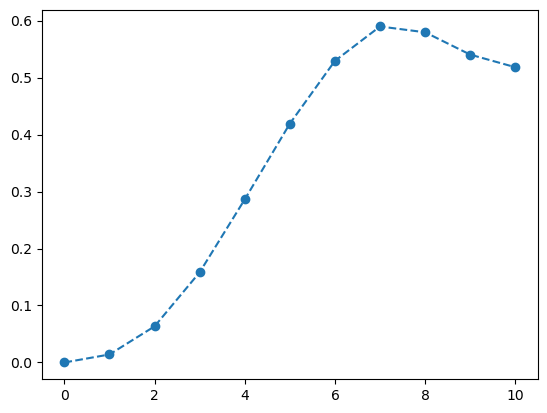

In [313]:
energy_variation2 = [ i.get_potential_energy() for i in images]
energy_variation2 = np.array(energy_variation2)
energy_variation2 -= energy_variation2.min()

plt.plot(energy_variation2, "o--")

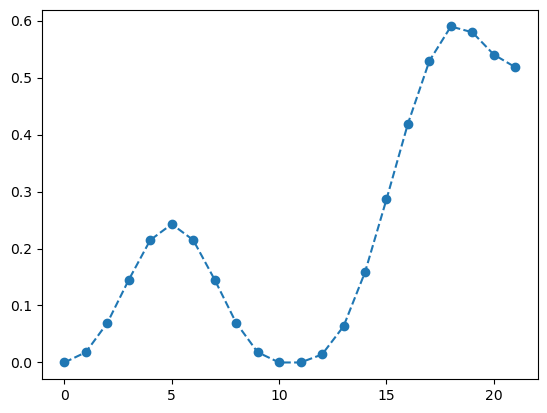

In [314]:
energy_variation = []
energy_variation = np.concatenate((energy_variation1, energy_variation2))
plt.plot(energy_variation, 'o--')

#### V0+T2 -> V0 +T3

In [315]:
V0_T3 = bulk.copy()
del V0_T3[36]
# V0_T3.plot3d()
H = pr.create.structure.atoms('H', positions=[(2.83, 2.83/4, 2.83/2)], cell=cell)
V0_T3 += H
V0_T3.plot3d()

NGLWidget()

In [316]:
IS = images[-1].copy()
IS.calc = lammps2
FS = V0_T3.to_ase()
FS.calc = lammps2

opt = BFGS(IS)
opt.run(fmax=0.01)

opt = BFGS(FS)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 16:43:17     -437.787860        0.009622
      Step     Time          Energy          fmax
BFGS:    0 16:43:17     -437.329149        1.872000
BFGS:    1 16:43:17     -437.497176        1.293718
BFGS:    2 16:43:17     -437.674138        0.328436
BFGS:    3 16:43:17     -437.692134        0.280252
BFGS:    4 16:43:18     -437.717634        0.293143
BFGS:    5 16:43:18     -437.731237        0.207911
BFGS:    6 16:43:18     -437.736942        0.086474
BFGS:    7 16:43:18     -437.738488        0.076945
BFGS:    8 16:43:18     -437.739461        0.062832
BFGS:    9 16:43:18     -437.740179        0.067460
BFGS:   10 16:43:18     -437.740519        0.049499
BFGS:   11 16:43:18     -437.740730        0.036039
BFGS:   12 16:43:18     -437.740974        0.036750
BFGS:   13 16:43:19     -437.741234        0.033091
BFGS:   14 16:43:19     -437.741431        0.026676
BFGS:   15 16:43:19     -437.741565        0.023682
BFGS:   16 16:43

True

In [290]:
view(IS)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

In [317]:
images = [IS]
images[0].calc = lammps2
for i in range(9):
    image = IS.copy()
    lammps2 = LAMMPSlib(lmpcmds=cmds2)
    image.calc = lammps2
    images.append(image) 
images.append(FS)
lammps2 = LAMMPSlib(lmpcmds=cmds2)
images[-1].calc = lammps2

neb = ase.mep.NEB(images, climb=True)
neb.interpolate()
minimizer = ase.optimize.FIRE(neb)
minimizer.run(fmax=0.01)

      Step     Time          Energy          fmax
FIRE:    0 16:43:26     -437.561023        0.726475
FIRE:    1 16:43:27     -437.579056        0.587528
FIRE:    2 16:43:27     -437.603352        0.442096
FIRE:    3 16:43:28     -437.620665        0.325971
FIRE:    4 16:43:28     -437.627258        0.369095
FIRE:    5 16:43:29     -437.629340        0.472875
FIRE:    6 16:43:30     -437.630494        0.452618
FIRE:    7 16:43:30     -437.632591        0.413016
FIRE:    8 16:43:31     -437.635252        0.355896
FIRE:    9 16:43:32     -437.638007        0.284033
FIRE:   10 16:43:32     -437.640393        0.201246
FIRE:   11 16:43:33     -437.642069        0.113729
FIRE:   12 16:43:33     -437.642934        0.121995
FIRE:   13 16:43:34     -437.643205        0.135210
FIRE:   14 16:43:35     -437.643248        0.173243
FIRE:   15 16:43:35     -437.643578        0.185479
FIRE:   16 16:43:36     -437.644556        0.166915
FIRE:   17 16:43:36     -437.646091        0.129918
FIRE:   18 16:

True

In [318]:
ase.visualize.view(images)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

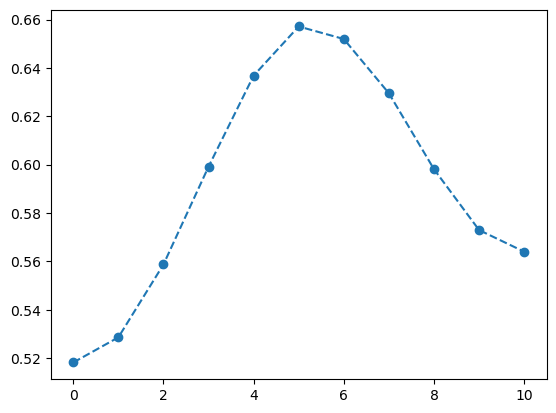

In [319]:
energy_variation3 = [ i.get_potential_energy() for i in images]
energy_variation3 = np.array(energy_variation3)
energy_variation3 -= energy_variation3.min()
energy_variation3 += energy_variation2[-1]

plt.plot(energy_variation3, "o--")

(-0.01, 1.0)

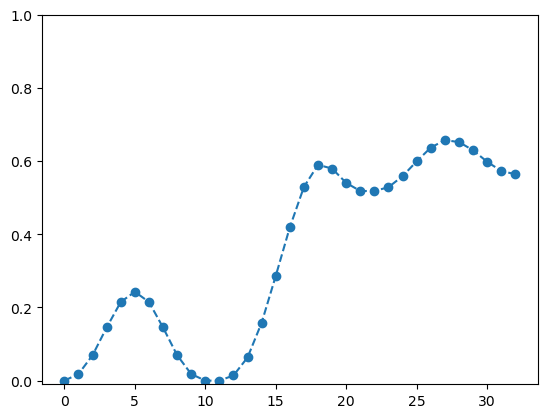

In [320]:
energy_variation = np.concatenate((energy_variation1, energy_variation2, energy_variation3))
plt.plot(energy_variation, 'o--')
plt.ylim(-0.01, 1.0)

#### V0+T3 -> V0 +T4

In [324]:
V0_T4 = bulk.copy()
del V0_T4[36]
H = pr.create.structure.atoms('H', positions=[(2.83, 2.83/4*3, 2.83/2)], cell=cell)
V0_T4 += H
V0_T4.plot3d()

NGLWidget()

In [325]:
IS = images[-1].copy()
IS.calc = lammps2
FS = V0_T4.copy()
FS.calc = lammps2

opt = BFGS(IS)
opt.run(fmax=0.01)

opt = BFGS(FS)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 16:48:03     -437.742045        0.009925
      Step     Time          Energy          fmax
BFGS:    0 16:48:03     -437.294805        2.072591
BFGS:    1 16:48:03     -437.474648        1.463889
BFGS:    2 16:48:03     -437.670412        0.358358
BFGS:    3 16:48:03     -437.691701        0.273061
BFGS:    4 16:48:04     -437.718599        0.336582
BFGS:    5 16:48:04     -437.734235        0.222243
BFGS:    6 16:48:04     -437.741437        0.181719
BFGS:    7 16:48:04     -437.743779        0.164174
BFGS:    8 16:48:04     -437.745352        0.134278
BFGS:    9 16:48:04     -437.746778        0.106729
BFGS:   10 16:48:04     -437.747697        0.098540
BFGS:   11 16:48:04     -437.748395        0.069868
BFGS:   12 16:48:04     -437.749200        0.072766
BFGS:   13 16:48:05     -437.750106        0.076163
BFGS:   14 16:48:05     -437.750815        0.050663
BFGS:   15 16:48:05     -437.751259        0.040572
BFGS:   16 16:48

True

In [254]:
view(FS)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

In [326]:
images = [IS]
images[0].calc = lammps2
for i in range(9):
    image = IS.copy()
    lammps2 = LAMMPSlib(lmpcmds=cmds2)
    image.calc = lammps2
    images.append(image)
images.append(FS)
lammps2 = LAMMPSlib(lmpcmds=cmds2)
images[-1].calc = lammps2

neb = ase.mep.NEB(images, climb=True)
neb.interpolate()
minimizer = ase.optimize.FIRE(neb)
minimizer.run(fmax=0.01)

      Step     Time          Energy          fmax
FIRE:    0 16:48:15     -437.505688        1.394043
FIRE:    1 16:48:16     -437.543685        1.115264
FIRE:    2 16:48:17     -437.593454        0.653262
FIRE:    3 16:48:17     -437.625778        0.238264
FIRE:    4 16:48:18     -437.632573        0.326934
FIRE:    5 16:48:18     -437.633730        0.308872
FIRE:    6 16:48:19     -437.635843        0.273694
FIRE:    7 16:48:20     -437.638555        0.223311
FIRE:    8 16:48:20     -437.641416        0.171197
FIRE:    9 16:48:21     -437.643979        0.119719
FIRE:   10 16:48:21     -437.645903        0.084228
FIRE:   11 16:48:22     -437.647049        0.093369
FIRE:   12 16:48:23     -437.647582        0.134478
FIRE:   13 16:48:23     -437.647778        0.174468
FIRE:   14 16:48:24     -437.648104        0.195763
FIRE:   15 16:48:24     -437.648917        0.188614
FIRE:   16 16:48:25     -437.650172        0.147477
FIRE:   17 16:48:26     -437.651269        0.072367
FIRE:   18 16:

True

In [327]:
view(images)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

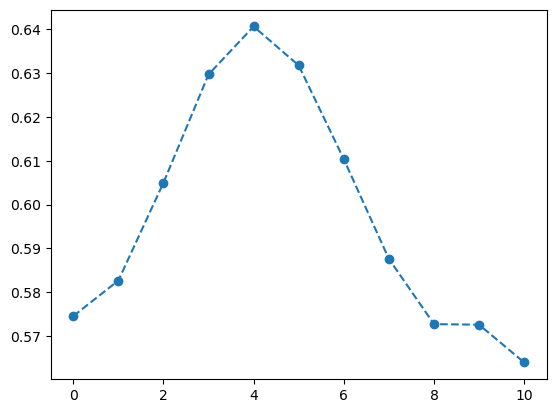

In [329]:
energy_variation4 = [ i.get_potential_energy() for i in images]
energy_variation4 = np.array(energy_variation4)
energy_variation4 -= energy_variation4.min()
energy_variation4 += energy_variation3[-1]

plt.plot(energy_variation4, "o--")

(0.0, 1.0)

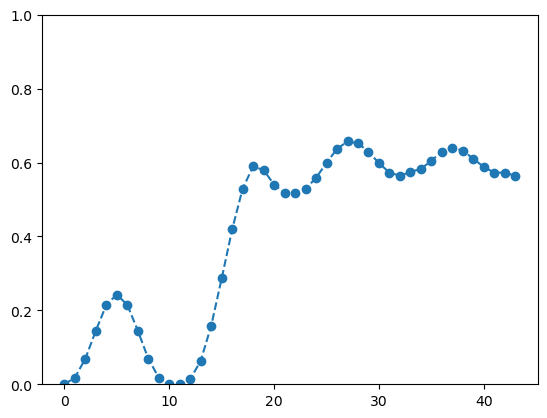

In [331]:
energy_variation = np.concatenate((energy_variation1, energy_variation2, energy_variation3, energy_variation4))
plt.plot(energy_variation, 'o--')
plt.ylim(0, 1.0)

#### V0+T4 -> V1+T4

In [351]:
V1_T4 = bulk.copy()
del V1_T4[19]
H = pr.create.structure.atoms('H', positions=[(2.83, 2.83/4*3, 2.83/2)], cell=cell)
V1_T4 += H
V1_T4.plot3d()

NGLWidget()

In [352]:
FS = V1_T4.to_ase()
FS.calc = lammps2
opt = BFGS(FS)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 17:01:18     -437.767474        1.285829
BFGS:    1 17:01:18     -437.853553        1.118651
BFGS:    2 17:01:18     -437.996391        0.715218
BFGS:    3 17:01:18     -438.021340        0.638218
BFGS:    4 17:01:19     -438.073678        0.617752
BFGS:    5 17:01:19     -438.119479        0.517378
BFGS:    6 17:01:19     -438.161438        0.421599
BFGS:    7 17:01:19     -438.188212        0.424131
BFGS:    8 17:01:19     -438.210050        0.418207
BFGS:    9 17:01:19     -438.235168        0.384304
BFGS:   10 17:01:19     -438.255981        0.261196
BFGS:   11 17:01:19     -438.267289        0.234035
BFGS:   12 17:01:19     -438.275124        0.248922
BFGS:   13 17:01:20     -438.282543        0.260315
BFGS:   14 17:01:20     -438.288601        0.238517
BFGS:   15 17:01:20     -438.292725        0.186704
BFGS:   16 17:01:20     -438.295883        0.152122
BFGS:   17 17:01:20     -438.299010        0.193918
BFGS:   18 17:

True

In [345]:
view(FS)

<Popen: returncode: None args: ['/home/gu.huang/miniconda3/envs/pyiron/bin/p...>

In [353]:
IS = V0_T4.copy().to_ase()
IS.calc = lammps2
opt = BFGS(IS)
opt.run(fmax=0.01)

      Step     Time          Energy          fmax
BFGS:    0 17:01:45     -437.294805        2.072591
BFGS:    1 17:01:45     -437.474648        1.463889
BFGS:    2 17:01:45     -437.670412        0.358358
BFGS:    3 17:01:45     -437.691701        0.273061
BFGS:    4 17:01:45     -437.718599        0.336582
BFGS:    5 17:01:45     -437.734235        0.222243
BFGS:    6 17:01:45     -437.741437        0.181719
BFGS:    7 17:01:45     -437.743779        0.164174
BFGS:    8 17:01:45     -437.745352        0.134278
BFGS:    9 17:01:46     -437.746778        0.106729
BFGS:   10 17:01:46     -437.747697        0.098540
BFGS:   11 17:01:46     -437.748395        0.069868
BFGS:   12 17:01:46     -437.749200        0.072766
BFGS:   13 17:01:46     -437.750106        0.076163
BFGS:   14 17:01:46     -437.750815        0.050663
BFGS:   15 17:01:46     -437.751259        0.040572
BFGS:   16 17:01:46     -437.751609        0.052628
BFGS:   17 17:01:46     -437.751953        0.045583
BFGS:   18 17:

True

In [ ]:
images = [IS]
images[0].calc = lammps2
for i in range(9):
    image = IS.copy()
    lammps2 = LAMMPSlib(lmpcmds=cmds2)
    image.calc = lammps2
    images.append(image)
images.append(FS)
lammps2 = LAMMPSlib(lmpcmds=cmds2)
images[-1].calc = lammps2

neb = ase.mep.NEB(images,climb=True)
neb.interpolate()
minimizer = ase.optimize.FIRE(neb)
minimizer.run(fmax=0.05)

      Step     Time          Energy          fmax
FIRE:    0 17:06:45     -326.491605      142.835934
FIRE:    1 17:06:45     -334.715298       96.186442
FIRE:    2 17:06:46     -336.670692      615.108214
FIRE:    3 17:06:47     -337.998874       91.758906
FIRE:    4 17:06:47     -340.104486       68.517701
FIRE:    5 17:06:48     -345.220250       92.528819
FIRE:    6 17:06:48     -347.153612      164.749248
FIRE:    7 17:06:49     -349.877148       41.950841
FIRE:    8 17:06:49     -353.956569      382.386501
FIRE:    9 17:06:50     -357.812896      134.136909
FIRE:   10 17:06:51     -360.343785       51.226707
FIRE:   11 17:06:51     -357.089939       66.891283
FIRE:   12 17:06:52     -358.173847      190.098277
FIRE:   13 17:06:52     -362.116609       88.063069
FIRE:   14 17:06:53     -363.047998      159.694552
FIRE:   15 17:06:54     -364.672908      508.903969
FIRE:   16 17:06:54     -366.670571      194.659940
FIRE:   17 17:06:55     -373.636536     1451.959177
FIRE:   18 17:

In [ ]:
energy_variation5 = [ i.get_potential_energy() for i in images]
energy_variation5 = np.array(energy_variation5)
energy_variation5 -= energy_variation5.min()

plt.plot(energy_variation5, "o--")

In [ ]:
energy_variation = np.concatenate((energy_variation1, energy_variation2, energy_variation3, energy_variation4, energy_variation5))
plt.plot(energy_variation, 'o--')
plt.ylim(0, 1.0)